# Thresholding segmentation

Segmentation is a process of partitioning an image (block of data), so that each partition is connected, homogeneous and identified by a unique label.

For project purposes, I will use advanced libraries **ONLY** for reading/displaying images and plotting some values. All the computations and algorithms are written by me from scratch.

## Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import norm
%matplotlib inline

## Read sample image

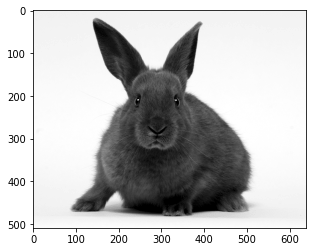

In [2]:
img = cv2.imread('Data/Segmentation/bunny.png', 0) 
plt.imshow(img, cmap='gray')

## Histogram
Before we move to computation, lets see the histogram for our image. To do that, we need to count the occurence of each value

### Count values

In [3]:
def count_intesity(data):
    intensity_count = {i: 0 for i in range(255+1)}

    for row in data:
        for value in row:
            intensity_count[value] += 1
    return intensity_count

In [4]:
intensities = count_intesity(img)

### Plot values

In [5]:
x_axis = list(intensities.keys())
y_axis = list(intensities.values())

In [6]:
def histogram(x_values, y_values, title="Histogram"):
    plt.figure()
    plt.title(title)
    plt.xlabel("intensity value")
    plt.ylabel("pixel count")
    plt.bar(x_axis, y_axis, width=5.0, color='r', edgecolor='none')

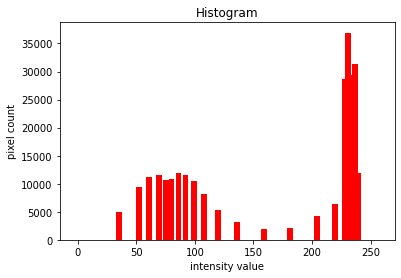

In [7]:
histogram(x_axis, y_axis)

Just by looking on the histogram above we can guess that "the best" threshold value would be around 150.

## Computinfg treshold

### Otsu's method

I decided to give it a shot and use Otsu's method for automatic image thresholding. All my computations are based on ["Reviewing Otsu’s Method For Image Thresholding"](http://www.ripublication.com/ijaerdoi/2015/ijaerv10n9_20.pdf) paper
Otsu's method


In my understanding minimizing the intra-class variance is equivalent to maximizing inter-class variance. We should then find t maxing:

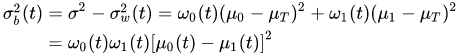


Weights $w_{0}$ and $w_{1}$ are the probabilities of the two classes seperated by a treshold $t$, and $\sigma_{0}^{2}$ and $\sigma_{1}^{2}$ are variances of these two classes

#### Weigths computation

In [8]:
def weights(t):
    s = sum(y_axis)
    w0 = sum(y_axis[:t]) / s
    w1 = sum(y_axis[t:]) / s
    
    return w0, w1

#### Mean computation

In [9]:
def mean(t):
    mu0 = sum([xv * yv for xv, yv in zip(x_axis[:t], y_axis[:t])]) / sum(y_axis[:t])
    mu1 = sum([xv * yv for xv, yv in zip(x_axis[t:], y_axis[t:])]) / sum(y_axis[t:])
        
    return mu0, mu1

#### Best treshold (max inter-class variance)

In [10]:
def find_best_treshold(data):
    max_var = -1
    thresh = -1

    for t in range(255+1):
        w0, w1 = weights(t)

        if w0 == 0 or w1 == 0:
            continue

        mu0, mu1 = mean(t)
        var = w0*w1*(mu0 - mu1)**2

        if var > max_var:
            max_var = var
            thresh = t
    
    print(f"Best treshold value is: {thresh}, with max variance: {max_var}")
    return thresh

### Threshold image

In [11]:
thresh = find_best_treshold(img)

Best treshold value is: 137, with max variance: 4995.05231660176


In [12]:
def treshold(data, t):
    return [[1 if value > t else 0 for value in row] for row in data]

In [13]:
tresholded_img = treshold(img, thresh)

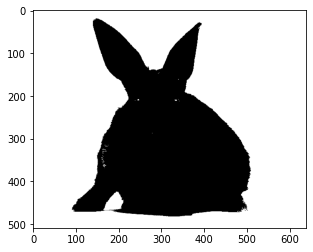

In [14]:
plt.imshow(tresholded_img, cmap='gray')

### Otsu's method for RGB values
The whole principle of Otsu's method is to work on intensities. If we are given an RGB image, we need to calculate intensity based on R, G and B values.


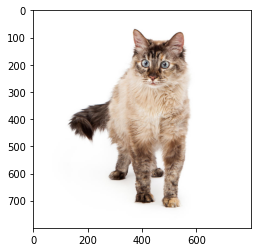

In [15]:
RGB_img = plt.imread('Data/Segmentation/cat.jpg') 
plt.imshow(RGB_img)

Sample value:

In [16]:
RGB_img[400][400]

array([235, 215, 204], dtype=uint8)

So as we can see, for pixel at position (400, 400) we have R = 235, G = 215 and B = 204.

#### RGB to intensity methods
there is not a perfect way for conversion to intenisties. There are some commonly used methods like the ones below:
1. Average method -> $ intensity_{i} = \frac{(R_{i} + G_{i} + B_{i})}{3}$
2. Lightness method -> $ intensity_{i} = \frac{(min(R_{i},G_{i},B_{i}) + max(R_{i},G_{i},B_{i}))}{2}$
1. Luminosity method -> $ intensity_{i} = 0.3*R_{i} + 0.59*G_{i} + 0.11*B_{i}$

In [17]:
def average(r, g, b):
    return (r + g + b) // 3 

def lightness(r, g, b):
    return (min(r, g, b) + max(r, g, b)) // 2 

def luminosity(r, g, b):
    return int(0.3*r + 0.59*g + 0.11*b)

convertion_methods = {"average method": average, "lightness method": lightness, "luminosity method": luminosity}

In [18]:
height, width, _ = RGB_img.shape
height, width

(800, 800)

In [19]:
images = {}

for method_name, convertion_method in convertion_methods.items():
    img = [[convertion_method(*RGB_img[i][j]) for j in range(width)] for i in range(height)]
    images[method_name] = img

c:\users\wiewi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  
c:\users\wiewi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


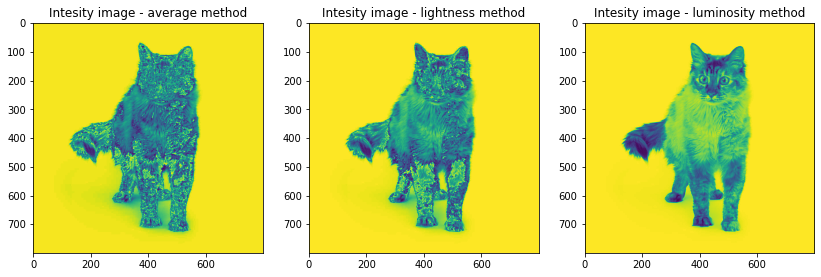

In [20]:
plt.figure(figsize=(14,14))

for i, image in enumerate(images.items()):
    name, img = image
    plt.subplot(1,3,i+1)    
    plt.imshow(img)
    plt.title(f"Intesity image - {name}")

plt.show()

#### Histogram and treshold computing

Best treshold value is: 56, with max variance: 419.62863167577405
Best treshold value is: 88, with max variance: 833.7758242795406
Best treshold value is: 185, with max variance: 2199.863628470793


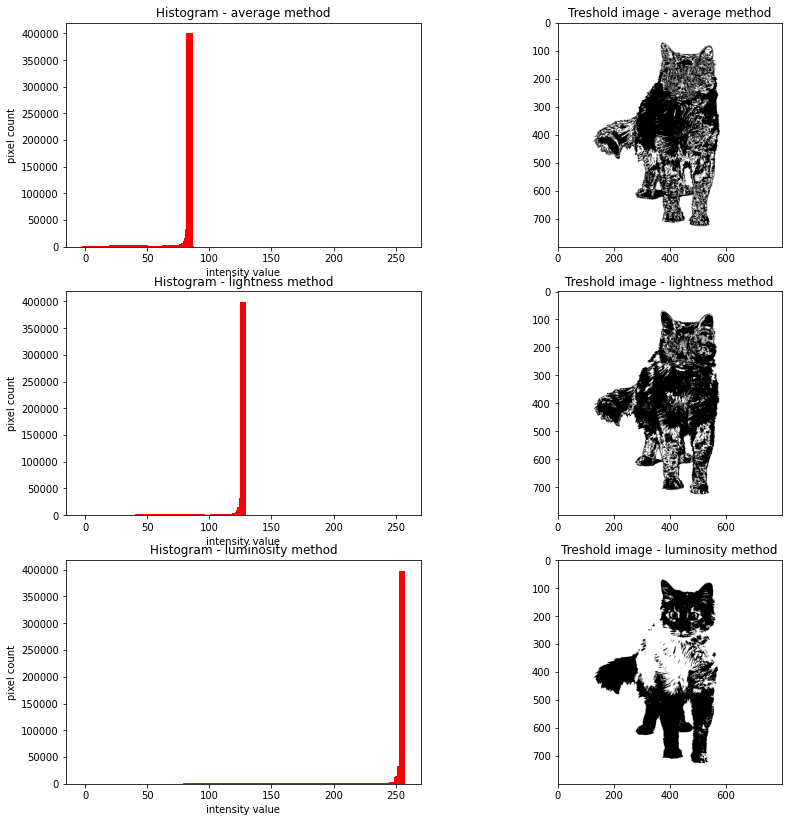

In [21]:
plt.figure(figsize=(14,14))

for i, image in enumerate(images.items()):
    name, img = image
    
    intensities = count_intesity(img)

    x_axis = list(intensities.keys())
    y_axis = list(intensities.values())

    plt.subplot(3,2, (i * 2) + 1)  
    
    plt.title(f"Histogram - {name}")
    plt.xlabel("intensity value")
    plt.ylabel("pixel count")
    plt.bar(x_axis, y_axis, width=5.0, color='r', edgecolor='none')
    thresh = find_best_treshold(img)
    
    tresholded_img = treshold(img, thresh)
    
    plt.subplot(3,2, (i * 2) + 2)  
    plt.imshow(tresholded_img, cmap='gray')
    plt.title(f"Treshold image - {name}")
    
plt.show()